# <center>**Banking Loan Analytics**<center>

---
# **Mục lục**

- [1. Cài đặt thư viện và Nhập dữ liệu](#1.-Cài-đặt-thư-viện-và-Nhập-Dữ-Liệu)
- [2. Tạo báo cáo phân tích dữ liệu tự động](#2-tạo-báo-cáo-phân-tích-dữ-liệu-tự-động-eda---exploratory-data-analysis)
- [3. Xử lý dữ liệu & Thống kê mô tả](#3-xử-lý-dữ-liệu--thống-kê-mô-tả)
- [4. Modeling](#4-modeling)
   + [4.1. KNN](#41-knn)
   + [4.2. Logistic Regression](#42-logisticregression)
   + [4.3. Random Forest](#43-random-forest)
   + [4.4. Dự báo với mẫu chưa chuẩn hoá](#44-dự-báo-trên-dữ-liệu-chưa-chuẩn-hoá)
   + [4.5. ROC & AUC](#45-roc--auc)


## 1. Cài đặt thư viện và Nhập Dữ Liệu

In [1]:
import zipcodes as zcode
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from  sklearn.model_selection import cross_val_score
import warnings
import sklearn.metrics
import ydata_profiling as pf
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
import plotly.express as pe
from sklearn import preprocessing
from scipy.integrate import quad
import ipywidgets
%matplotlib inline

Bộ dữ liệu này chứa thông tin của hơn 5.000 khách hàng. Dựa trên số điểm mà mỗi khách hàng đạt được, một khoản vay được đề xuất cho họ. Các đặc điểm (thuộc tính) trong bộ dữ liệu bao gồm:

- **Age**: Tuổi của khách hàng (tính theo số năm đã hoàn thành)

- **Experience**: Số năm kinh nghiệm làm việc chuyên môn

- **Income**: Thu nhập hàng năm của khách hàng

- **Zip code**: Mã vùng (Zip code) tại địa chỉ nhà của khách hàng

- **Family**: Quy mô gia đình của khách hàng

- **CCAvg**: Mức chi tiêu trung bình hàng tháng bằng thẻ tín dụng

- **Education**: Trình độ học vấn (Đại học = 1, Sau đại học = 2, Trình độ cao cấp = 3)

- **Mortgage**: Giá trị khoản vay thế chấp nhà (nếu có)

- **Personal_loan**: Khách hàng này có chấp nhận khoản vay cá nhân được đề nghị trong chiến dịch gần nhất không?

- **Security_account**: Khách hàng có tài khoản chứng khoán tại ngân hàng không?

- **Cd_account**: Khách hàng có tài khoản chứng chỉ tiền gửi (CD) tại ngân hàng không?

- **Online**: Khách hàng có sử dụng dịch vụ ngân hàng trực tuyến không?

- **Creditcard**: Khách hàng có sử dụng thẻ tín dụng do Universal Bank phát hành không?

In [2]:
data = pd.read_csv('E:/Banking_Loan_Analytics_SQL/Bank_Personal_Loan_Modelling.csv')
data.head()

ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49     91107       4    1.6          1         0   
1   2   45          19      34     90089       3    1.5          1         0   
2   3   39          15      11     94720       1    1.0          1         0   
3   4   35           9     100     94112       1    2.7          2         0   
4   5   35           8      45     91330       4    1.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [3]:
df=pd.DataFrame(data)  
df2=df.drop(columns='ID')
df2

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0      25           1      49     91107       4    1.6          1         0   
1      45          19      34     90089       3    1.5          1         0   
2      39          15      11     94720       1    1.0          1         0   
3      35           9     100     94112       1    2.7          2         0   
4      35           8      45     91330       4    1.0          2         0   
...   ...         ...     ...       ...     ...    ...        ...       ...   
4995   29           3      40     92697       1    1.9          3         0   
4996   30           4      15     92037       4    0.4          1        85   
4997   63          39      24     93023       2    0.3          3         0   
4998   65          40      49     90034       3    0.5          2         0   
4999   28           4      83     92612       3    0.8          1         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  
0                 0                   1           0       0           0  
1                 0                   1           0       0           0  
2                 0                   0           0       0           0  
3                 0                   0           0       0           0  
4                 0                   0           0       0           1  
...             ...                 ...         ...     ...         ...  
4995              0                   0           0       1           0  
4996              0                   0           0       1           0  
4997              0                   0           0       0           0  
4998              0                   0           0       1           0  
4999              0                   0           0       1           1  

[5000 rows x 13 columns]

Chi phí được tính theo tháng chứ không phải theo năm

In [4]:
df2['CCAvg'] = df2['CCAvg']* 12
df2.head()

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
0   25           1      49     91107       4   19.2          1         0   
1   45          19      34     90089       3   18.0          1         0   
2   39          15      11     94720       1   12.0          1         0   
3   35           9     100     94112       1   32.4          2         0   
4   35           8      45     91330       4   12.0          2         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

## 2. Tạo báo cáo phân tích dữ liệu tự động (EDA - Exploratory Data Analysis)
| 📊 Hạng mục             | Nội dung                                                               |
| ----------------------- | ---------------------------------------------------------------------- |
| **Tổng quan dữ liệu**   | Số dòng, cột, giá trị thiếu, kiểu dữ liệu                              |
| **Thống kê mô tả**      | Trung bình, min, max, độ lệch chuẩn, phân vị (quantile),...            |
| **Phân phối dữ liệu**   | Biểu đồ phân phối cho cột số (histogram, KDE)                          |
| **Giá trị bị thiếu**    | Biểu đồ heatmap cho missing values                                     |
| **Mối tương quan**      | Biểu đồ hệ số tương quan (correlation heatmap) giữa các biến số        |
| **Tương quan danh mục** | Tương quan giữa các cột phân loại                                      |
| **Cảnh báo tự động**    | Cảnh báo nếu có dữ liệu trùng lặp, cực trị (outlier), mất cân bằng,... |


In [5]:
pf.ProfileReport(df2,title="Báo cáo tự động về dữ liệu Banking Loan", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 13/13 [00:00<00:00, 25.29it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## 3. Xử lý dữ liệu & Thống kê mô tả

### Kiểm tra dữ liệu bị thiếu và trùng lặp

In [6]:
df2.isnull().sum()
df2.nunique()
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIP Code            5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal Loan       5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 507.9 KB


Age   Experience       Income      ZIP Code       Family  \
count  5000.000000  5000.000000  5000.000000   5000.000000  5000.000000   
mean     45.338400    20.104600    73.774200  93152.503000     2.396400   
std      11.463166    11.467954    46.033729   2121.852197     1.147663   
min      23.000000    -3.000000     8.000000   9307.000000     1.000000   
25%      35.000000    10.000000    39.000000  91911.000000     1.000000   
50%      45.000000    20.000000    64.000000  93437.000000     2.000000   
75%      55.000000    30.000000    98.000000  94608.000000     3.000000   
max      67.000000    43.000000   224.000000  96651.000000     4.000000   

             CCAvg    Education     Mortgage  Personal Loan  \
count  5000.000000  5000.000000  5000.000000    5000.000000   
mean     23.255256     1.881000    56.498800       0.096000   
std      20.971908     0.839869   101.713802       0.294621   
min       0.000000     1.000000     0.000000       0.000000   
25%       8.400000     1.000000     0.000000       0.000000   
50%      18.000000     2.000000     0.000000       0.000000   
75%      30.000000     3.000000   101.000000       0.000000   
max     120.000000     3.000000   635.000000       1.000000   

       Securities Account  CD Account       Online   CreditCard  
count         5000.000000  5000.00000  5000.000000  5000.000000  
mean             0.104400     0.06040     0.596800     0.294000  
std              0.305809     0.23825     0.490589     0.455637  
min              0.000000     0.00000     0.000000     0.000000  
25%              0.000000     0.00000     0.000000     0.000000  
50%              0.000000     0.00000     1.000000     0.000000  
75%              0.000000     0.00000     1.000000     1.000000  
max              1.000000     1.00000     1.000000     1.000000

### Biến Experience
Chúng ta có số âm trong lịch sử bảo hiểm, điều này là vô lý. Vì vậy, chúng ta chuyển đổi chúng thành số dương:

In [7]:
Negative1,Negative2,Negative3=df2[df2['Experience']<0]['Experience'].value_counts()
print('The number of negative data in the data set from the Experience column :')
print ('-1:',Negative1,'\n-2:',Negative2,'\n-3:',Negative3)

The number of negative data in the data set from the Experience column :
-1: 33 
-2: 15 
-3: 4


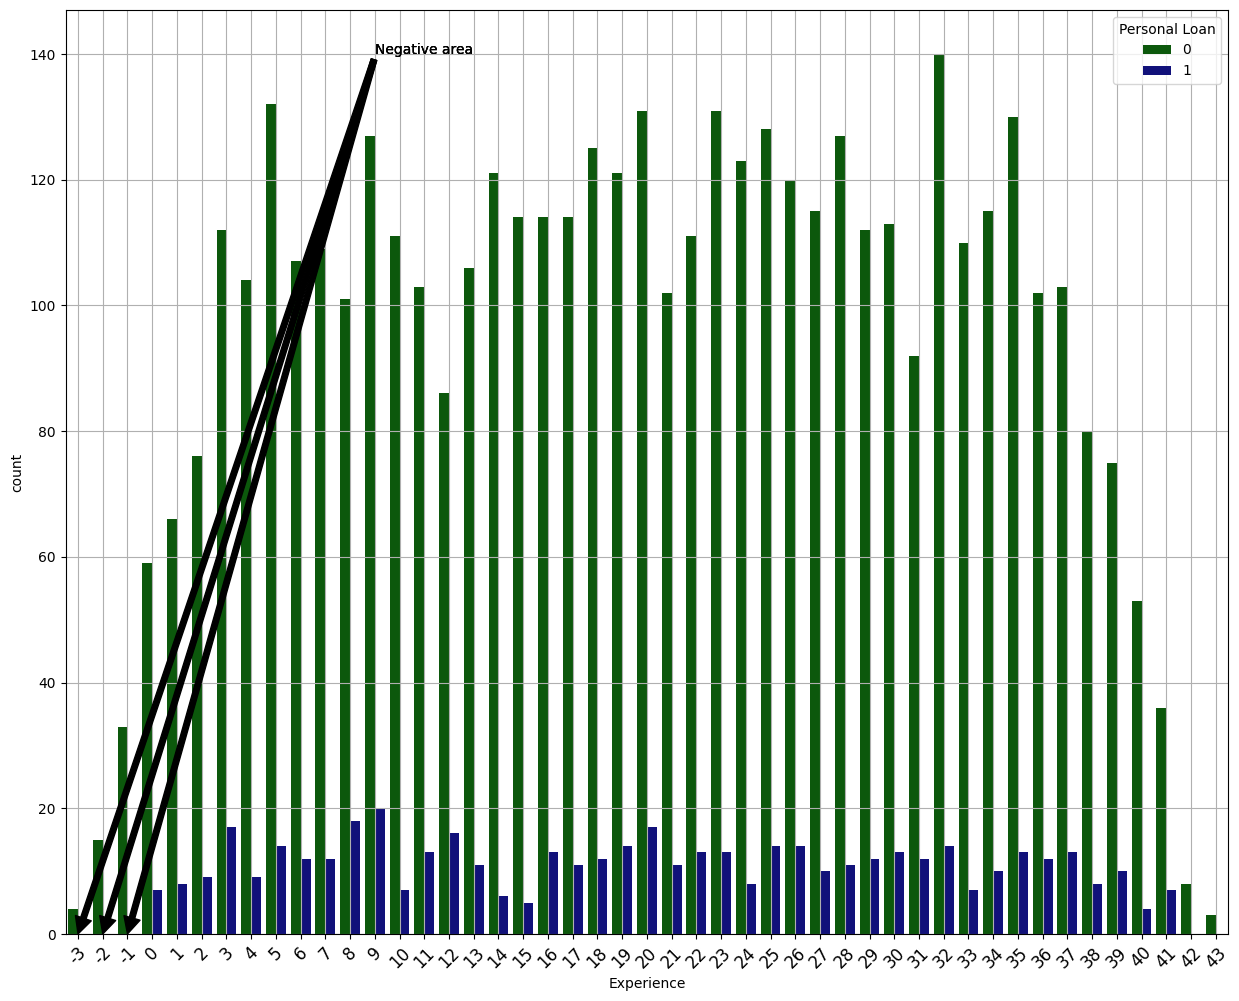

In [8]:
plt.figure(figsize=(15,12))
sns.countplot(x=df2['Experience'],hue=df2['Personal Loan'],data=df2,palette={1: 'darkblue', 0: 'darkgreen'})
plt.annotate('Negative area',xy=(2,0),xytext=(12,140),arrowprops=dict(facecolor="black",shrink=3))
plt.annotate('Negative area',xy=(1,0),xytext=(12,140),arrowprops=dict(facecolor="black",shrink=3))
plt.annotate('Negative area',xy=(0,0),xytext=(12,140),arrowprops=dict(facecolor="black",shrink=3))
plt.xticks(rotation=45,fontsize=12)
plt.grid()

<Axes: xlabel='Experience', ylabel='Density'>

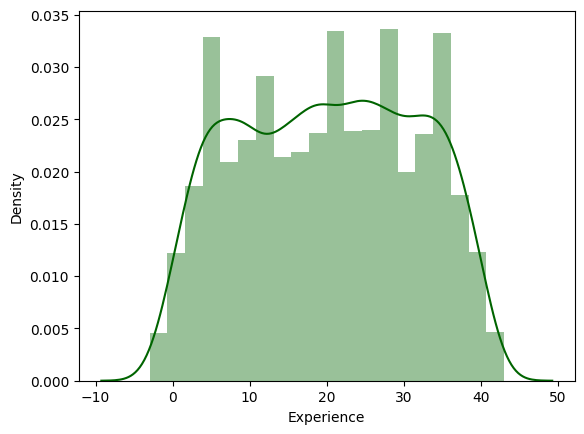

In [9]:
sns.distplot(df2['Experience'],color='darkgreen' ,bins=20)

In [10]:
df2[df2['Experience']<0].style.highlight_max(color = 'red', axis = 1,subset=['Experience'])


In [11]:
df2['Experience']=abs(df2['Experience'])
print(df2[df2['Experience'] < 0]['Experience'].value_counts())
print('Số âm chuyển thành số dương.')

Series([], Name: count, dtype: int64)
Số âm chuyển thành số dương.


### Biến Zip_code

In [12]:
print(df2['ZIP Code'].nunique())


467


In [13]:
noise=df2[(df2['ZIP Code']<20000) & (df2['Personal Loan']<.2)]
noise

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
384   51          25      21      9307       4    7.2          3         0   

     Personal Loan  Securities Account  CD Account  Online  CreditCard  
384              0                   0           0       1           1

Text(0, 0.5, 'Personal Loan')

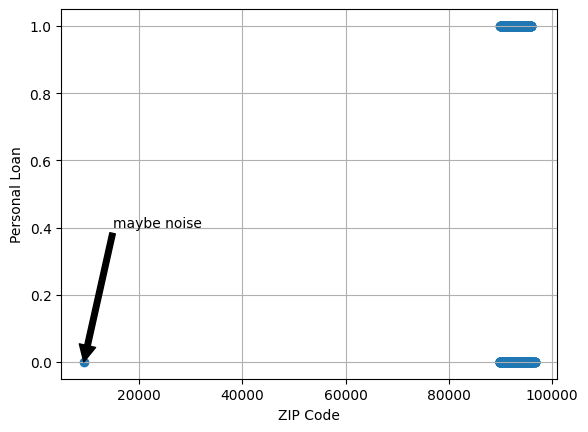

In [14]:
plt.scatter(x=df2['ZIP Code'],y=df2['Personal Loan'])
plt.annotate('maybe noise',xy=(9307,0),xytext=(15000,.4),arrowprops=dict(facecolor="black",shrink=3))
plt.grid()
plt.xlabel('ZIP Code')
plt.ylabel('Personal Loan')

In [15]:
df2.drop(index=[384],inplace=True)

### Tương quan giữa các biến

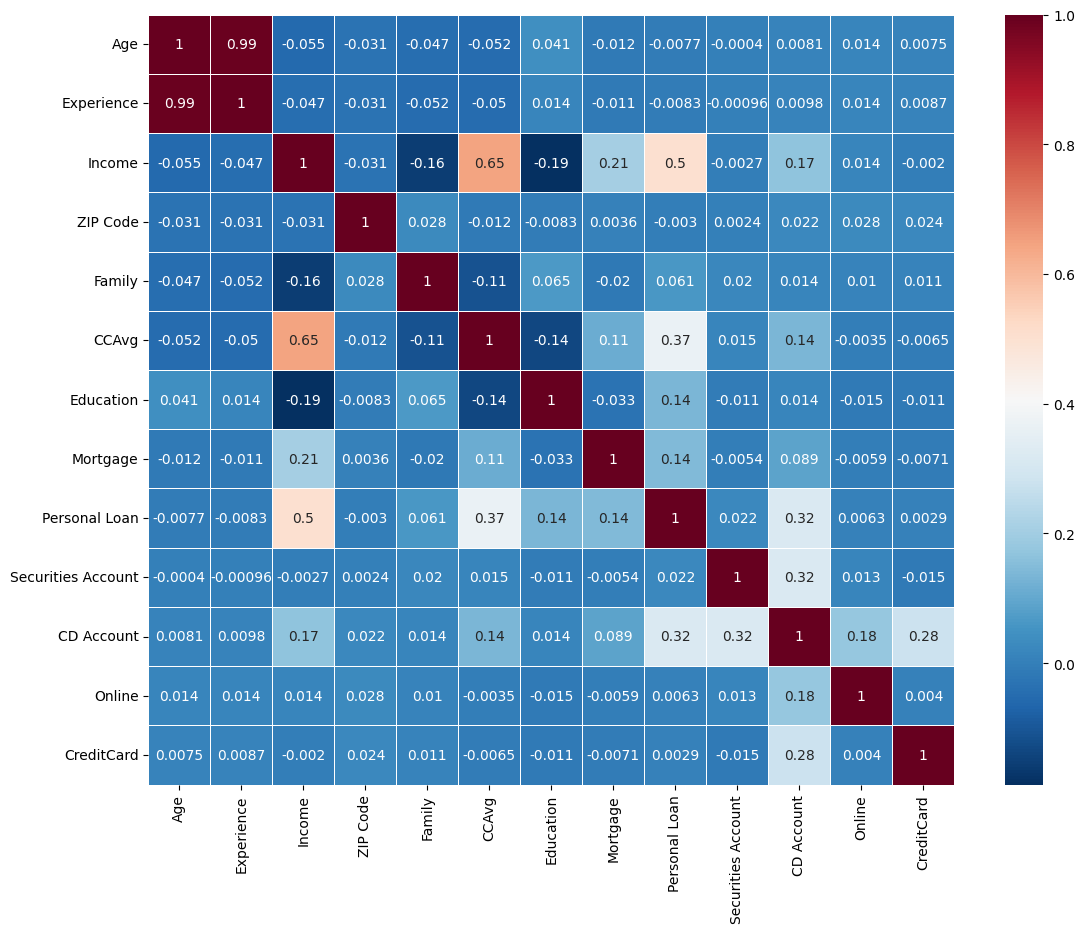

In [16]:
fig, ax = plt.subplots(figsize = (13, 10)) 
ax = sns.heatmap(df2.corr(),cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.show()

Text(0.5, 1.0, 'CCAvg & Incom')

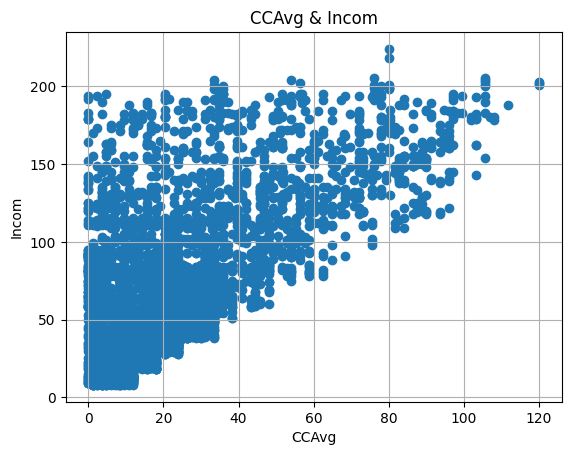

In [17]:
plt.scatter(x='CCAvg',y='Income',data=df2)
plt.grid()
plt.xlabel('CCAvg')
plt.ylabel('Incom')
plt.title('CCAvg & Incom')

<Axes: xlabel='Family', ylabel='Income'>

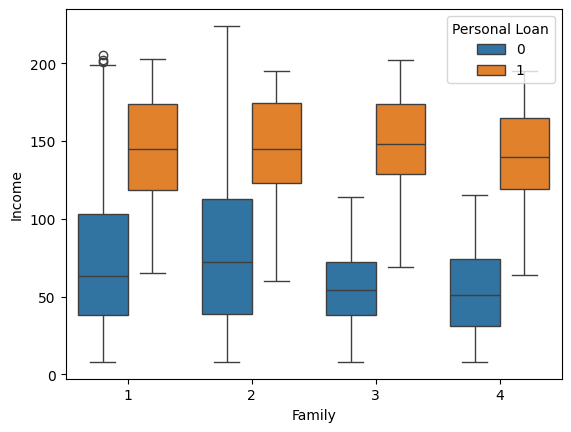

In [18]:
sns.boxplot(x=df2['Family'],y=df2['Income'],hue=df2['Personal Loan'])


<Axes: xlabel='Education', ylabel='count'>

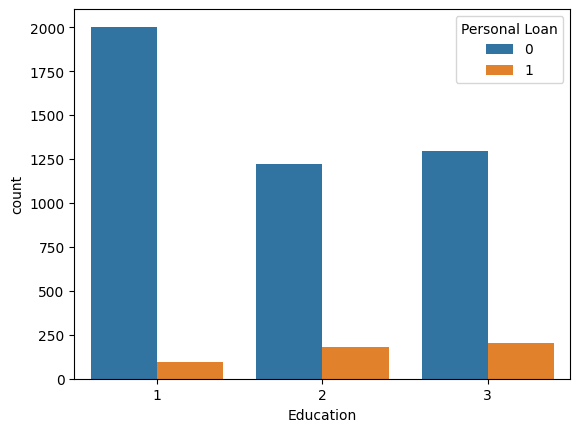

In [19]:
sns.countplot(x='Education',hue='Personal Loan',data=df2)


### Trực quan hoá kiểm tra giá trị outliers

In [20]:
fig = pe.box(df2,x='Age', color='Personal Loan')
fig2=pe.box(df2,x='Experience',color='Personal Loan')
fig3=pe.box(df2,x='Income',color='Personal Loan')
fig4=pe.box(df2,x='ZIP Code',color='Personal Loan')
fig5=pe.box(df2,x='Family',color='Personal Loan')
fig6=pe.box(df2,x='CCAvg',color='Personal Loan')
fig7=pe.box(df2,x='Education',color='Personal Loan')
fig8=pe.box(df2,x='Mortgage',color='Personal Loan')
fig.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()
fig6.show()
fig7.show()
fig8.show()

Chúng tôi có những ngoại lệ trong biến Mortgage

In [21]:
Outlier_mortgage=df2[(df2['Mortgage']>247) & (df2['Personal Loan']==0)].style.highlight_max(color = 'red', axis = 1,subset=['Mortgage'])
Outlier_mortgage

In [22]:
Outlier_mortgage=df2[(df2['Mortgage']>483) & (df2['Personal Loan']==1)].style.highlight_max(color = 'red', axis = 1,subset=['Mortgage'])
Outlier_mortgage

Text(0.5, 1.0, 'CCAvg & Incom')

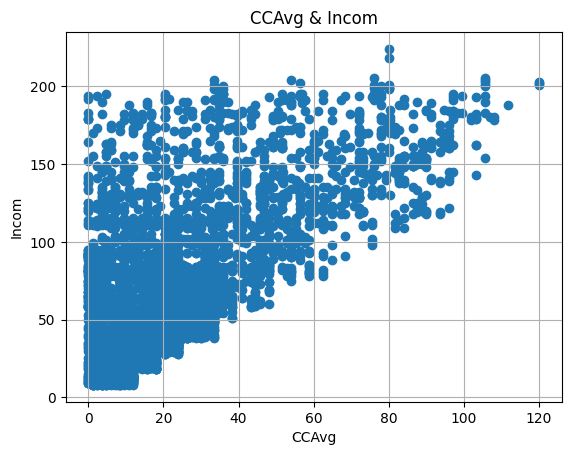

In [23]:
plt.scatter(x='CCAvg',y='Income',data=df2)
plt.grid()
plt.xlabel('CCAvg')
plt.ylabel('Incom')
plt.title('CCAvg & Incom')

Text(0.5, 0, 'Age')

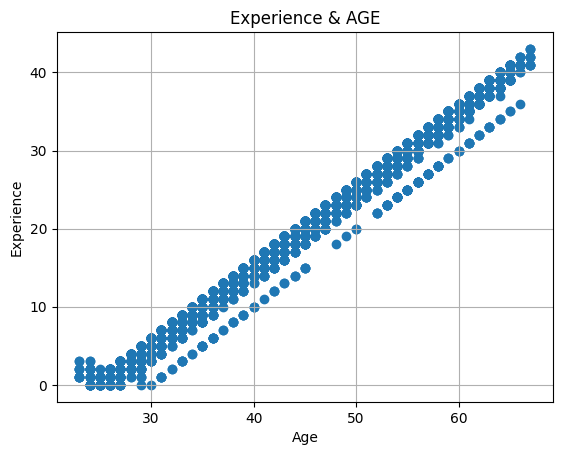

In [24]:
plt.scatter(data=df2, y='Experience',x='Age')
plt.grid()
plt.title('Experience & AGE')
plt.ylabel('Experience')
plt.xlabel('Age')

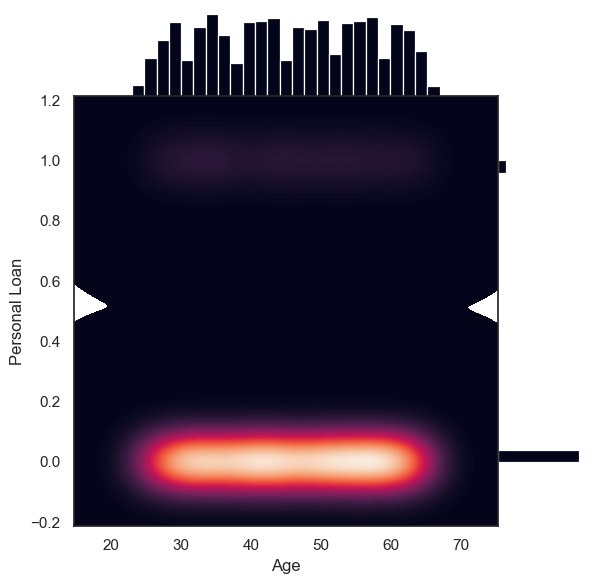

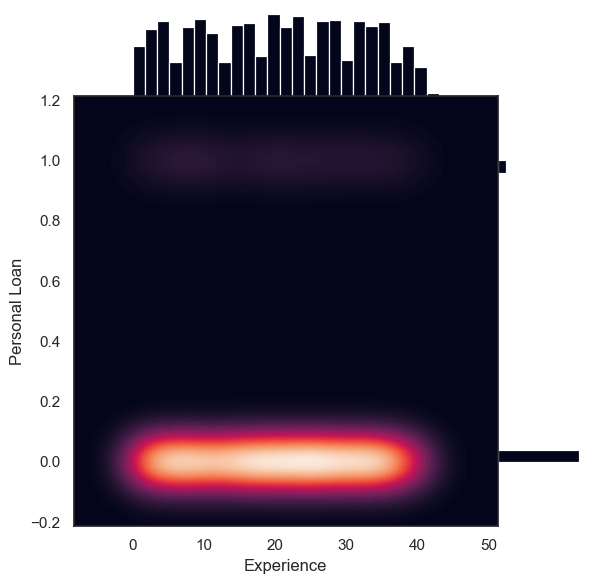

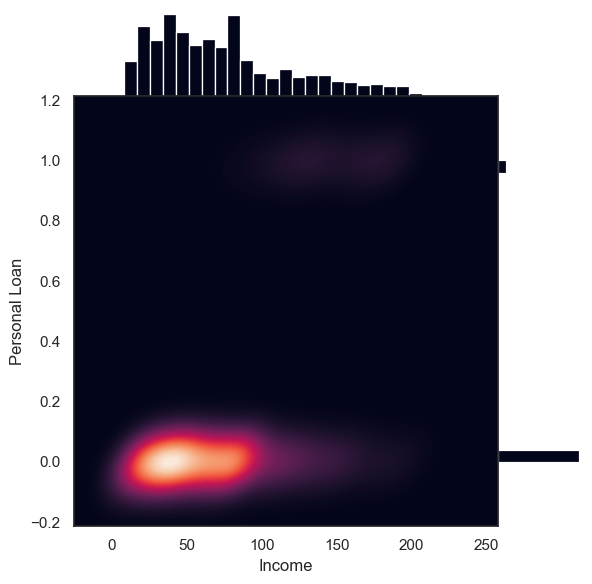

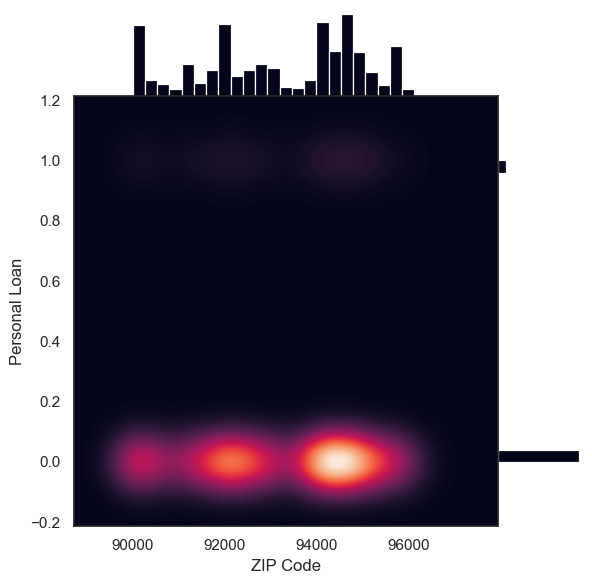

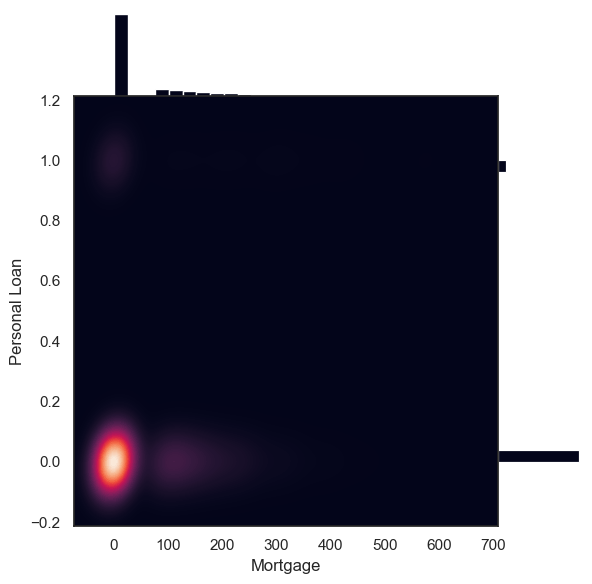

In [25]:
df_c=['Age','Experience','Income','ZIP Code','Mortgage']  
for i in df_c:
    
    sns.set_theme(style="white")
    g = sns.JointGrid(data=df2, x=i,y='Personal Loan',space=0)
    g.plot_joint(sns.kdeplot,fill=True,thresh=0, levels=100, cmap="rocket")
    g.plot_marginals(sns.histplot, color="#03051A", alpha=1, bins=25)

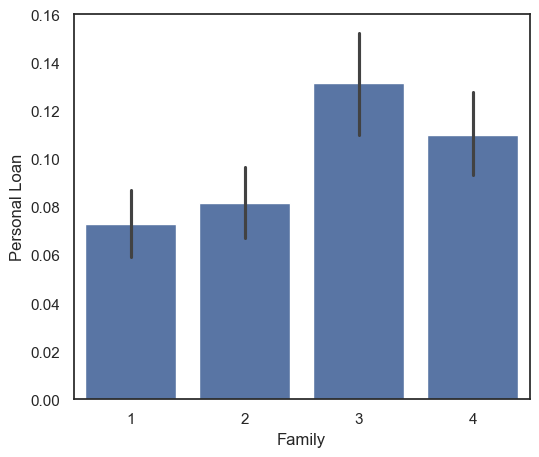

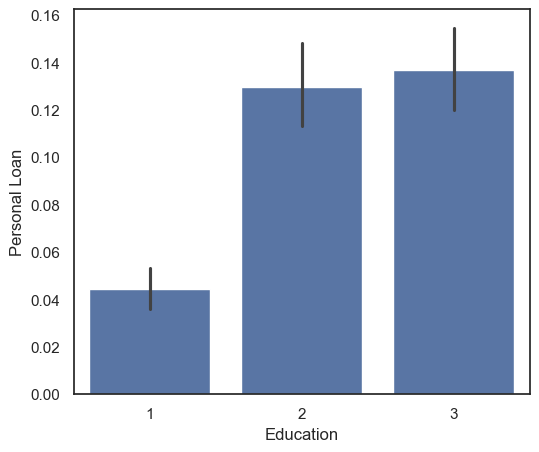

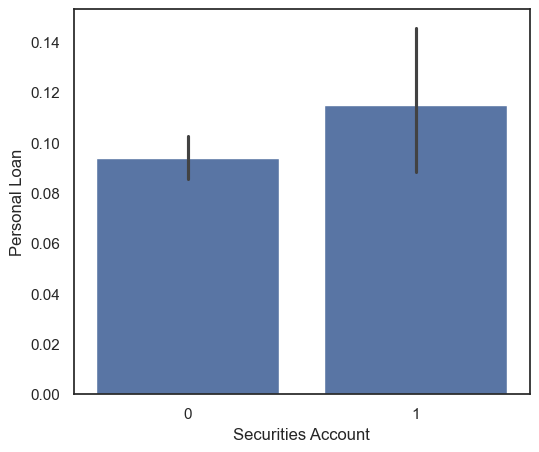

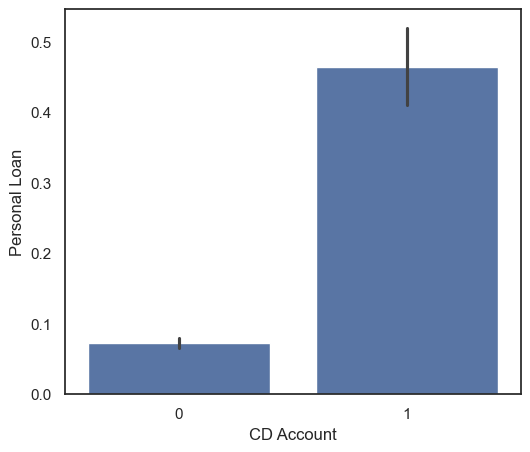

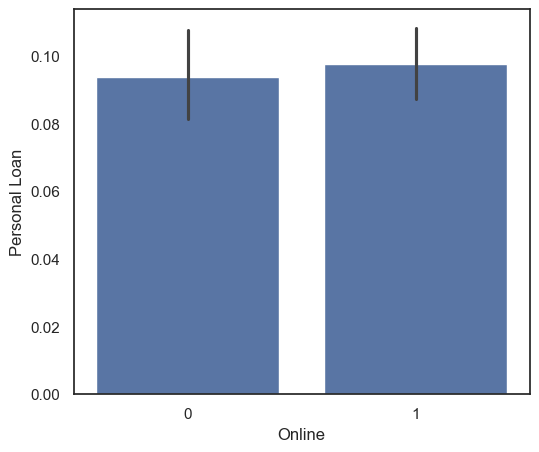

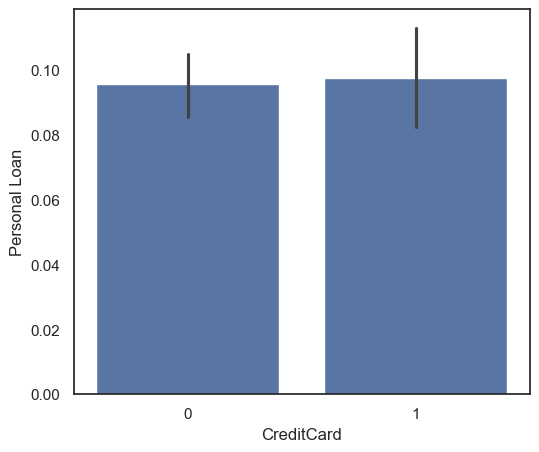

In [26]:
df_unique=['Family','Education','Securities Account','CD Account','Online','CreditCard']                           
i=0
while i <7:
    fig=plt.figure(figsize=[20,5])
    plt.subplot(1,3,1)
    sns.barplot(x=df_unique[i],y='Personal Loan',data=df2)
    
    i+=1
    if i ==6:
        break

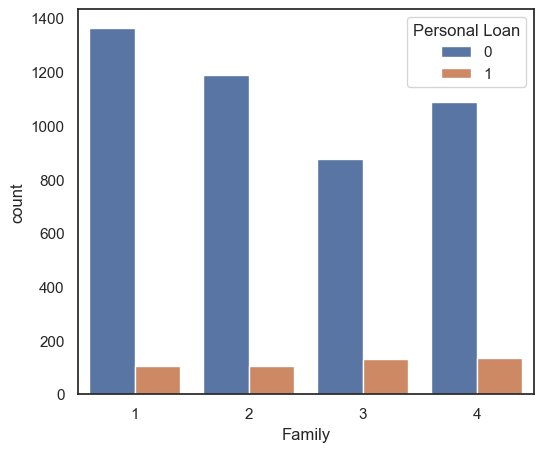

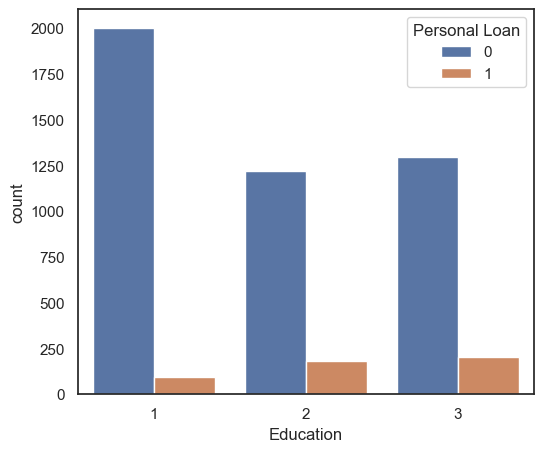

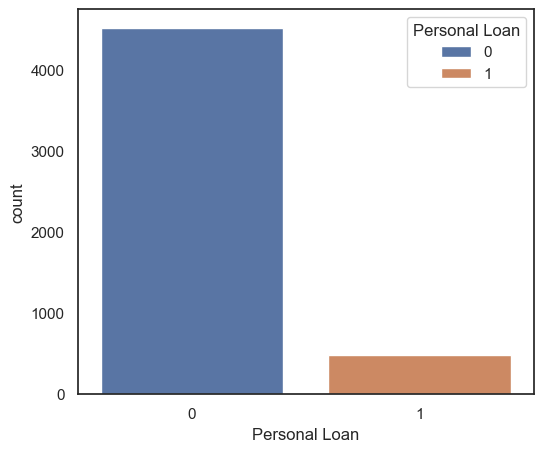

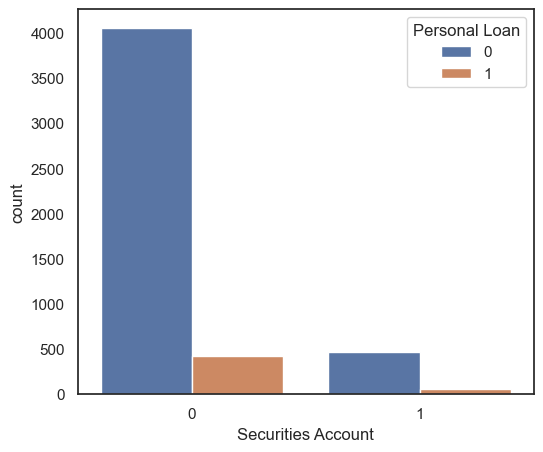

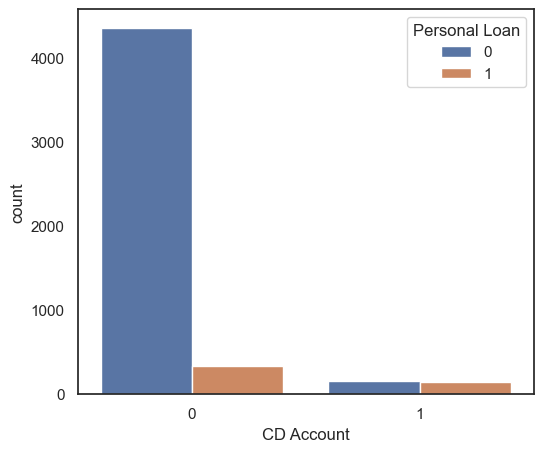

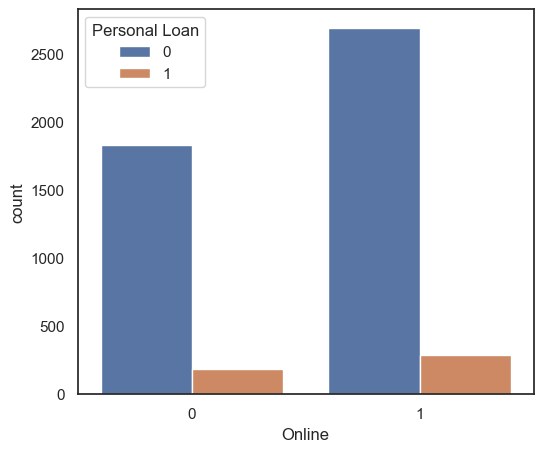

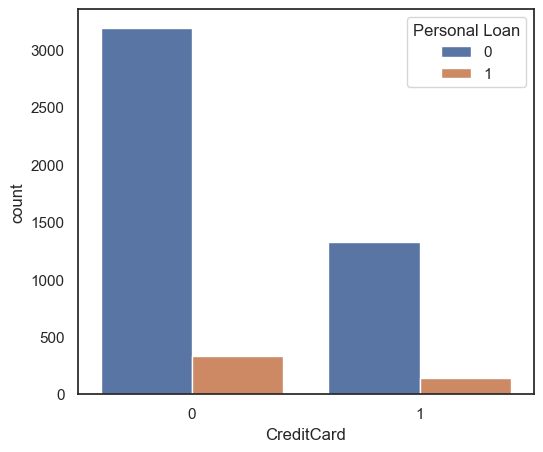

In [27]:
df_unique=['Family','Education','Personal Loan','Securities Account','CD Account','Online','CreditCard']                           
i=0
while i <8:
    fig=plt.figure(figsize=[20,5])
    plt.subplot(1,3,1)
    sns.countplot(x=df_unique[i],hue=df2['Personal Loan'],data=df2)
    i+=1
    if i ==7:
        break

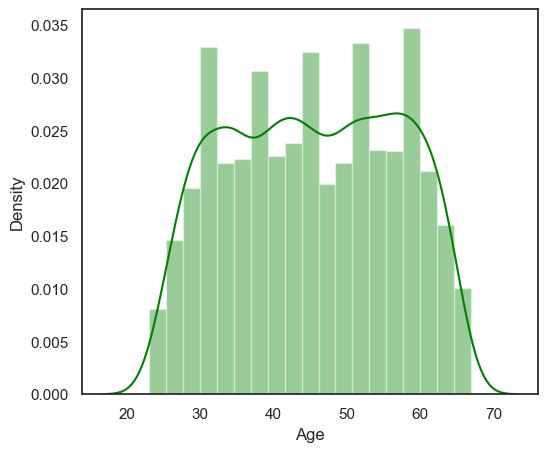

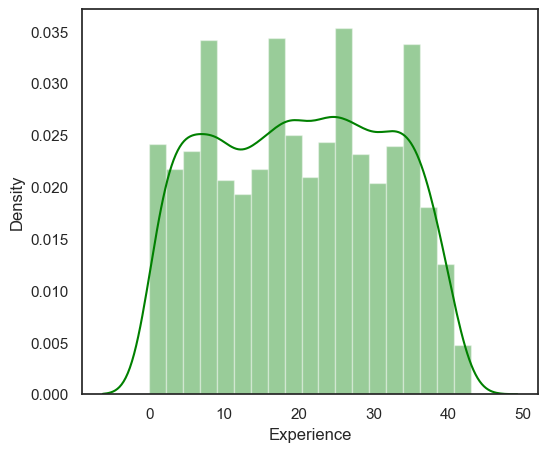

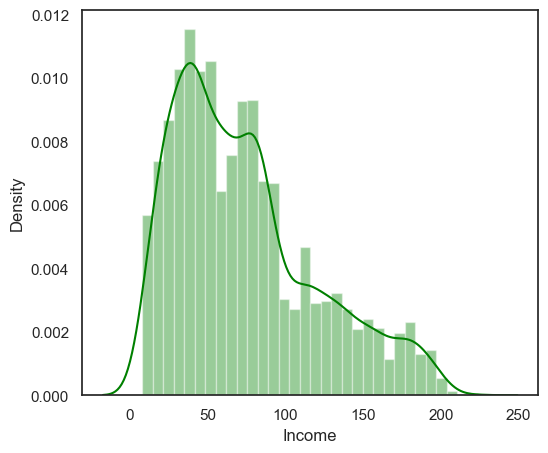

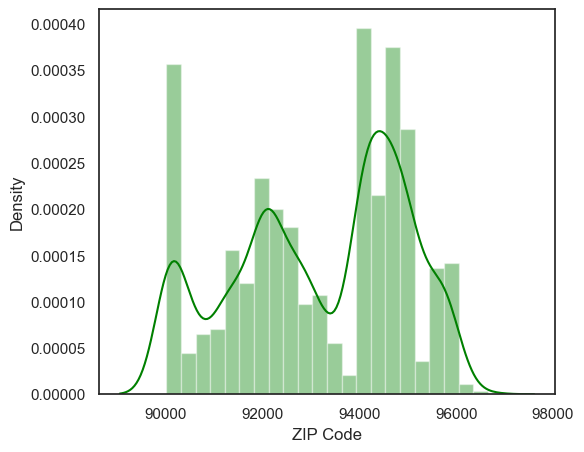

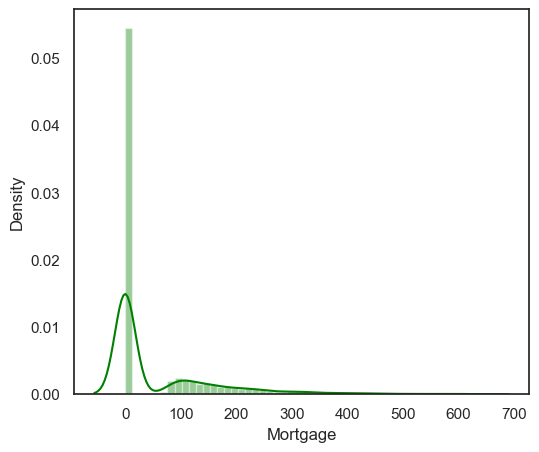

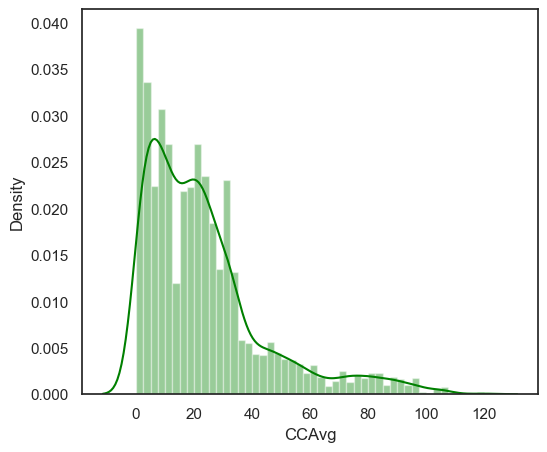

In [28]:
df_c=['Age','Experience','Income','ZIP Code','Mortgage','CCAvg']                           

for i in df_c:
    fig=plt.figure(figsize=[20,5])
    plt.subplot(1,3,1)
    sns.distplot(df2[i],color='green')

Tra cứu thông tin địa lý (quận/huyện, vĩ độ, kinh độ) dựa trên một danh sách mã ZIP (list_zipcode), sau đó thêm các thông tin này vào một DataFrame (df2).

In [29]:
list_zipcode=list(df2['ZIP Code'])

In [30]:
country=[]
lat=[]
long=[]
for x in list_zipcode:
    my_city_county=zcode.matching(str(x))
    if len(my_city_county)==1:
        County=my_city_county[0].get('county')
        Lat=my_city_county[0].get('lat')
        Long=my_city_county[0].get('long')
    else:
        County='notfound'
        Lat=np.NaN
        Long=np.NaN
    country.insert(0,County)
    lat.insert(0,Lat)
    long.insert(0,Long)
country.reverse()
lat.reverse()
long.reverse()
df2['Place']=country
df2['Latitude']=lat
df2['longitude']=long

In [32]:
df2.describe(include='all')

Age   Experience       Income      ZIP Code       Family  \
count   4999.000000  4999.000000  4999.000000   4999.000000  4999.000000   
unique          NaN          NaN          NaN           NaN          NaN   
top             NaN          NaN          NaN           NaN          NaN   
freq            NaN          NaN          NaN           NaN          NaN   
mean      45.337267    20.133627    73.784757  93169.275455     2.396079   
std       11.464033    11.416124    46.032281   1759.630610     1.147554   
min       23.000000     0.000000     8.000000  90005.000000     1.000000   
25%       35.000000    10.000000    39.000000  91911.000000     1.000000   
50%       45.000000    20.000000    64.000000  93437.000000     2.000000   
75%       55.000000    30.000000    98.000000  94608.000000     3.000000   
max       67.000000    43.000000   224.000000  96651.000000     4.000000   

              CCAvg    Education     Mortgage  Personal Loan  \
count   4999.000000  4999.000000  4999.000000    4999.000000   
unique          NaN          NaN          NaN            NaN   
top             NaN          NaN          NaN            NaN   
freq            NaN          NaN          NaN            NaN   
mean      23.258468     1.880776    56.510102       0.096019   
std       20.972776     0.839804   101.720837       0.294647   
min        0.000000     1.000000     0.000000       0.000000   
25%        8.400000     1.000000     0.000000       0.000000   
50%       18.000000     2.000000     0.000000       0.000000   
75%       30.000000     3.000000   101.000000       0.000000   
max      120.000000     3.000000   635.000000       1.000000   

        Securities Account   CD Account       Online   CreditCard  \
count          4999.000000  4999.000000  4999.000000  4999.000000   
unique                 NaN          NaN          NaN          NaN   
top                    NaN          NaN          NaN          NaN   
freq                   NaN          NaN          NaN          NaN   
mean              0.104421     0.060412     0.596719     0.293859   
std               0.305836     0.238273     0.490605     0.455574   
min               0.000000     0.000000     0.000000     0.000000   
25%               0.000000     0.000000     0.000000     0.000000   
50%               0.000000     0.000000     1.000000     0.000000   
75%               0.000000     0.000000     1.000000     1.000000   
max               1.000000     1.000000     1.000000     1.000000   

                     Place Latitude  longitude  
count                 4999     4966       4966  
unique                  39      451        451  
top     Los Angeles County  37.8746  -122.2547  
freq                  1095      169        169  
mean                   NaN      NaN        NaN  
std                    NaN      NaN        NaN  
min                    NaN      NaN        NaN  
25%                    NaN      NaN        NaN  
50%                    NaN      NaN        NaN  
75%                    NaN      NaN        NaN  
max                    NaN      NaN        NaN

In [32]:
df2[df2['Latitude'].isna()|df2['longitude'].isna()]

Age  Experience  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
106    43          17      69     92717       4  34.80          1         0   
172    38          13     171     92717       2  93.60          1         0   
184    52          26      63     92717       2  18.00          2         0   
321    44          20     101     92717       3  52.80          2        82   
366    50          24      35     92717       1   3.60          3         0   
468    34          10      21     92634       1   6.00          3         0   
476    60          34      53     92717       1   9.60          2         0   
630    32           7      35     96651       3  15.60          1       108   
672    51          27      23     96651       1   2.40          1         0   
695    29           4     115     92717       1  22.80          1         0   
721    49          24      39     92717       1  16.80          3         0   
780    32           7      42     92634       4   9.60          1         0   
1099   30           6      52     92717       3   8.40          2         0   
1189   42          17     115     92717       2   4.80          1         0   
1426   37          11      60     96651       3   6.00          3         0   
1483   58          32      63     92717       1  19.20          1         0   
1653   26           1      24     96651       2  10.80          3       123   
1752   33           8     155     92717       1  88.80          3         0   
1844   65          40      21     92717       3   1.20          3         0   
2049   43          18      94     92717       4  13.20          2         0   
2211   39          14      31     92717       2  16.80          2        94   
2218   38          13       9     92634       2   3.60          2         0   
2428   39          12     108     92717       4  44.04          2       301   
2486   61          36     130     92717       1  15.60          1       257   
2731   29           5      28     96651       1   2.40          3         0   
2957   61          36      53     92717       3   6.00          2         0   
3525   59          34      13     96651       4  10.80          2         0   
3887   24           2     118     92634       2  86.40          1         0   
4090   42          18      49     92717       3  25.20          3         0   
4276   50          24     155     92717       1  87.60          1         0   
4321   27           0      34     92717       1  24.00          2       112   
4384   45          20      61     92717       3  32.40          2         0   
4392   52          27      81     92634       4  45.60          2         0   

      Personal Loan  Securities Account  CD Account  Online  CreditCard  \
106               0                   0           0       1           1   
172               0                   0           0       1           0   
184               0                   1           0       1           0   
321               1                   0           0       0           0   
366               0                   0           0       1           0   
468               0                   0           0       1           0   
476               0                   1           0       0           1   
630               0                   0           0       0           1   
672               0                   0           0       1           0   
695               0                   0           0       0           0   
721               0                   0           0       1           0   
780               0                   0           0       1           1   
1099              0                   0           0       1           0   
1189              0                   0           0       1           0   
1426              0                   0           0       1           0   
1483              0                   1           0       1           0   
1653              0                   0     

Có 33 mã zip code không xác định được địa điểm

In [33]:
df2.isnull().sum()

Age                    0
Experience             0
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
Place                  0
Latitude              33
longitude             33
dtype: int64

In [34]:
df2[df2['Place']=='notfound']['ZIP Code'].value_counts()

ZIP Code
92717    22
96651     6
92634     5
Name: count, dtype: int64

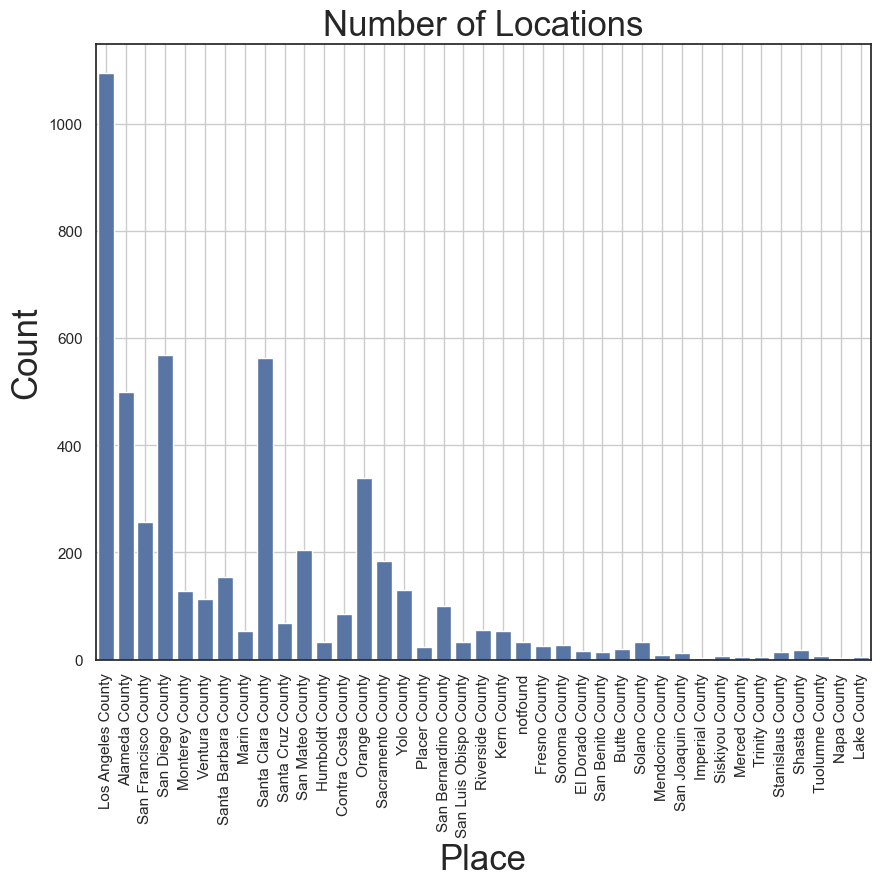

In [35]:
df2['Place'].value_counts()  
plt.figure(figsize=(10,8))
sns.countplot(x=df2['Place'])
plt.title('Number of Locations',fontsize=25)
plt.xticks(rotation=90)
plt.xlabel('Place',fontsize=25)
plt.ylabel('Count',fontsize=25)

plt.grid()
plt.show()

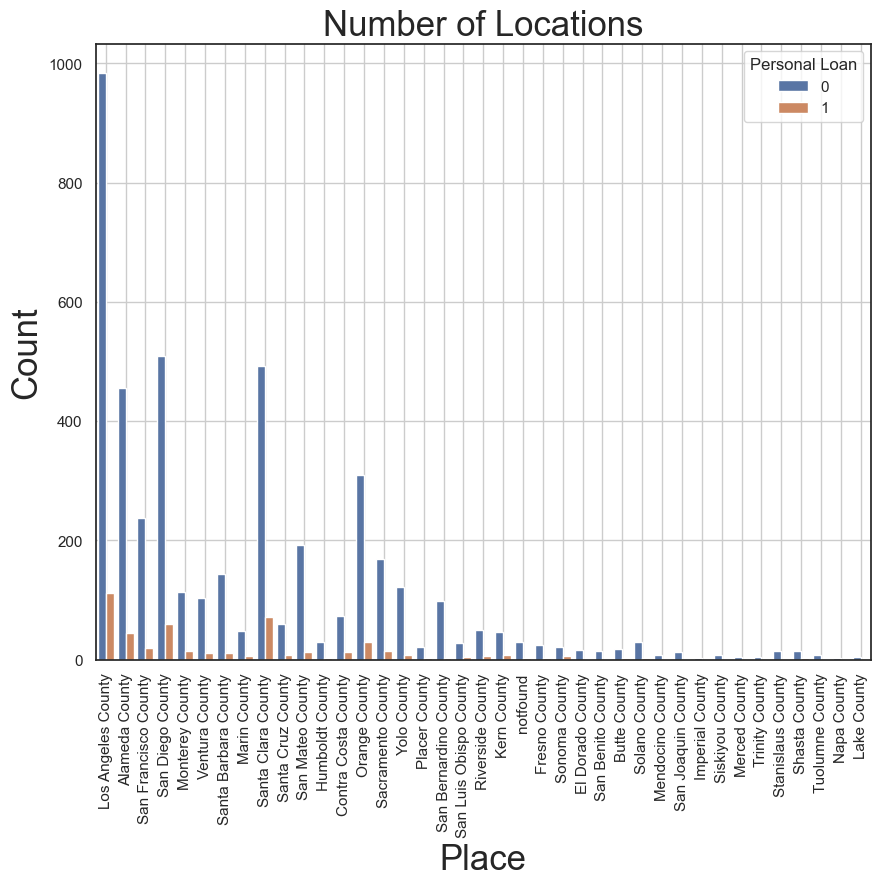

In [36]:
plt.figure(figsize=(10,8))
sns.countplot(x=df2['Place'],hue=df2['Personal Loan'])
plt.title('Number of Locations',fontsize=25)
plt.xticks(rotation=90)
plt.xlabel('Place',fontsize=25)
plt.ylabel('Count',fontsize=25)
plt.grid()
plt.show()

In [37]:
z_code92717=list(df2[df2['ZIP Code']==92717].index)
for i in z_code92717:
    df2['Place'].loc[i]='Irvine'
    df2['Latitude'].loc[i]=33.6462
    df2['longitude'].loc[i]=117.8398
df2[df2['ZIP Code']==92717].style.highlight_max(color = 'yellow', axis = 1,subset=['Personal Loan'])

In [38]:
z_code96651=list(df2[df2['ZIP Code']==96651].index)
for i in z_code96651:
    df2['Place'].loc[i]='Rudno nad Hronom'
    df2['Latitude'].loc[i]=48.4242
    df2['longitude'].loc[i]=18.7071
df2[df2['ZIP Code']==96651].style.highlight_max(color = 'yellow', axis = 1,subset=['Personal Loan'])

In [39]:
z_code92634=list(df2[df2['ZIP Code']==92634].index)
for i in z_code92634:
    df2['Place'].loc[i]='Fullerton'
    df2['Latitude'].loc[i]=33.8739
    df2['longitude'].loc[i]=-117.9028
df2[df2['ZIP Code']==92634].style.highlight_max(color = 'yellow', axis = 1,subset=['Personal Loan'])

3 mã zipcode không xác định được địa điểm đã được xử lý

In [40]:
df2=df2.astype({'Latitude':float,'longitude':float})

In [41]:
print('min:',df2.longitude.min())
print('max:',df2.longitude.max())
print('min:',df2.Latitude.min())
print('max:',df2.Latitude.max())

min: -124.0994
max: 117.8398
min: 32.5547
max: 48.4242


Text(0.5, 1.0, 'Longitude & longitude')

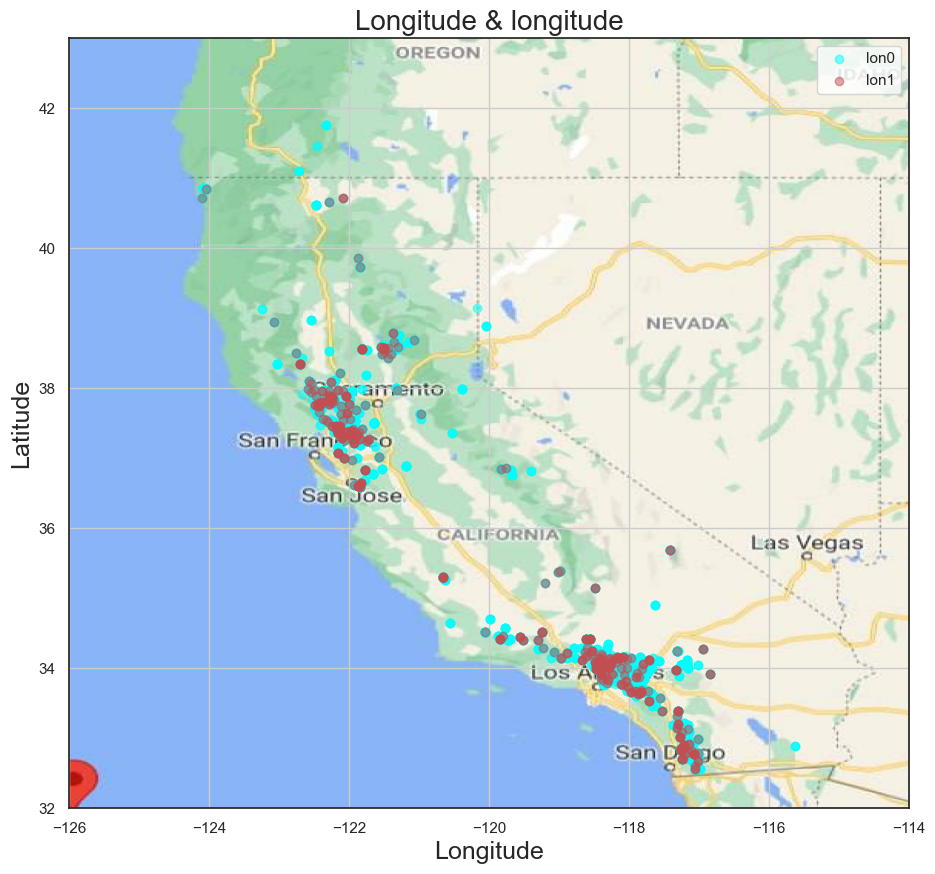

In [ ]:
img=plt.imread('E:/Banking_Loan_Analytics_SQL/IMG_7580.jpg')

target_0=df2[df2['Personal Loan']==0]
target_1=df2[df2['Personal Loan']==1]



plt.figure(figsize=(15,10))
plt.scatter(target_0['longitude'],target_0['Latitude'],c='cyan',label='lon0',alpha=.5)
plt.scatter(target_1['longitude'],target_1['Latitude'],c='r',label='lon1',alpha=.5)
plt.imshow(img,extent=[-126,-114,32,43])
plt.legend(loc='best')
plt.grid()
plt.xlabel('Longitude',fontsize=18)
plt.ylabel('Latitude',fontsize=18)
plt.title('Longitude & longitude',fontsize=20)

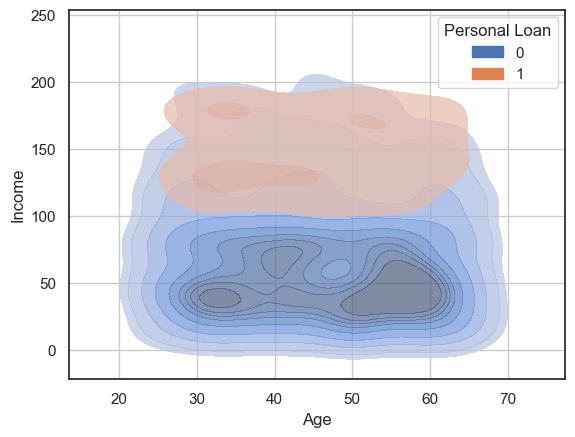

In [43]:
sns.kdeplot(data=df2,x='Age', y='Income', hue='Personal Loan',color='b',alpha=.7,weights=None,fill=True,multiple='fill', palette=None)
plt.grid()

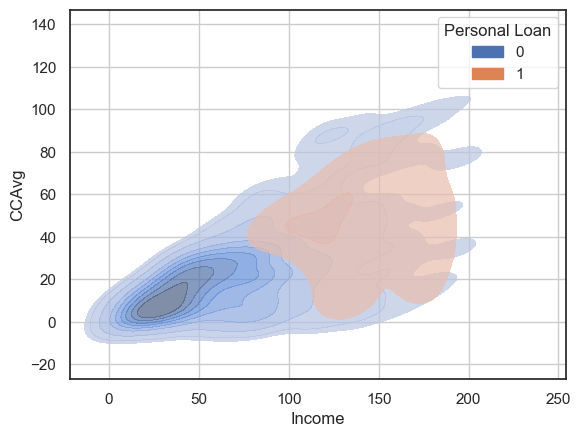

In [44]:
sns.kdeplot(data=df2,x='Income', y='CCAvg', hue='Personal Loan',color='b',alpha=.7,weights=None,fill=True,multiple='fill', palette=None)
plt.grid()

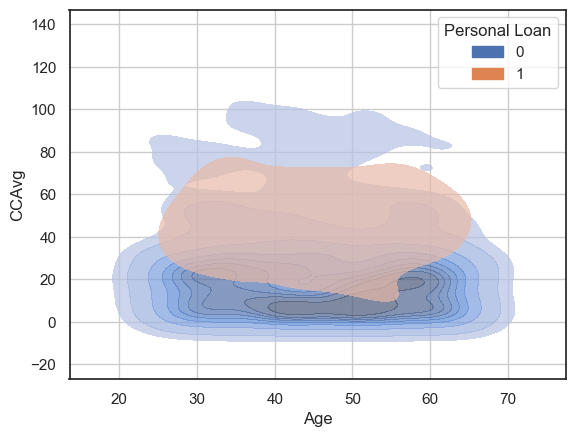

In [45]:
sns.kdeplot(data=df2,x='Age', y='CCAvg', hue='Personal Loan',color='b',alpha=.7,weights=None,fill=True,multiple='fill', palette=None)
plt.grid()

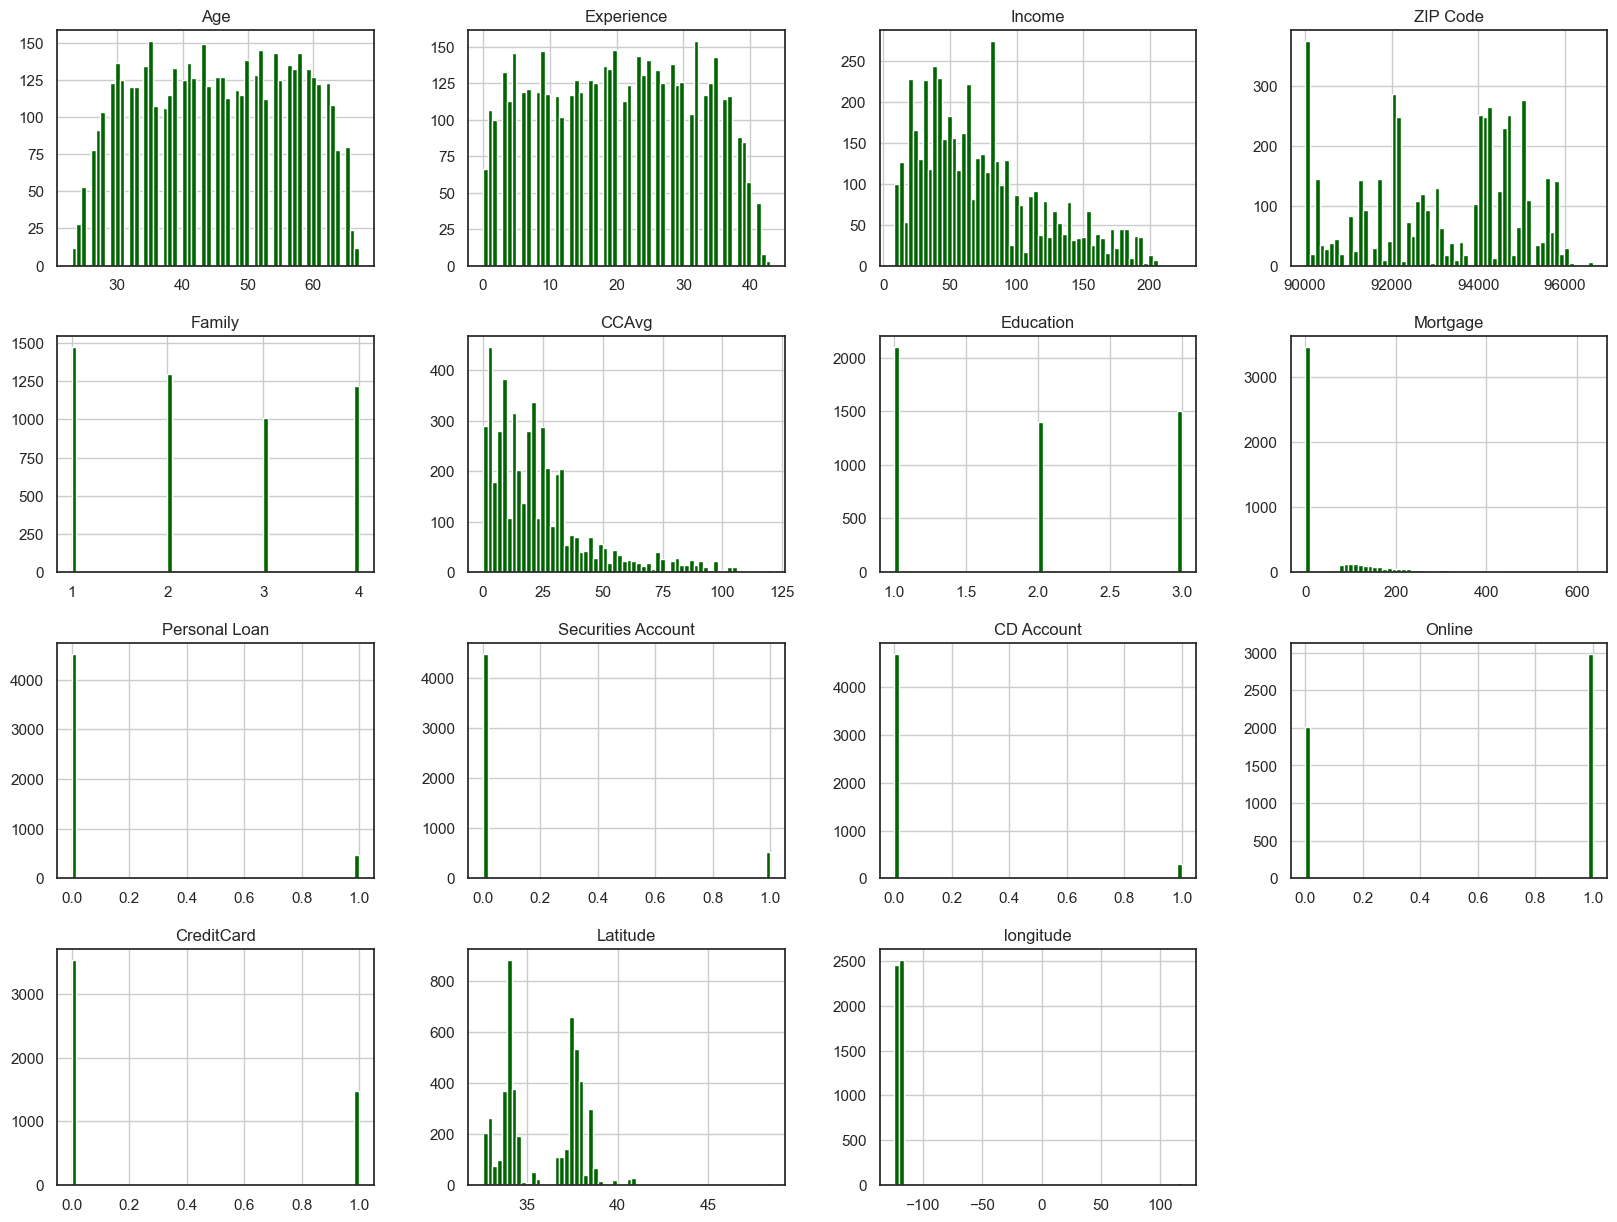

In [63]:
df2.hist(bins=60,figsize=(20,15),color='darkgreen')
plt.show()

## 4. Modeling

### 4.1 KNN
📘 Thông tin chính về mô hình KNN (K-Nearest Neighbors)

🔍 KNN là gì?
- Là mô hình **phân loại hoặc hồi quy** dựa trên **hàng xóm gần nhất**.
- Không học hàm rõ ràng, mà **dựa vào dữ liệu huấn luyện khi dự đoán**.

🧠 Nguyên lý hoạt động:
1. Tính khoảng cách (thường dùng **Euclidean**) giữa điểm cần dự đoán và các điểm trong tập huấn luyện.
2. Chọn **K điểm gần nhất**.
3. Dự đoán kết quả dựa trên:
   - **Phân loại**: lấy nhãn phổ biến nhất trong K hàng xóm.
   - **Hồi quy**: lấy **trung bình** giá trị trong K hàng xóm.

⚙️ Tham số quan trọng:
- `K` (số hàng xóm): ảnh hưởng trực tiếp đến độ chính xác.
- `metric`: cách tính khoảng cách (Euclidean, Manhattan,...).

✅ Ưu điểm:
- Dễ hiểu, dễ cài đặt.
- Không cần huấn luyện mô hình.
- Hiệu quả khi dữ liệu không quá lớn.

❌ Nhược điểm:
- Chậm khi dự đoán với **dữ liệu lớn**.
- Nhạy cảm với **nhiễu** và **thang đo** (cần chuẩn hóa dữ liệu).
- Không tốt khi dữ liệu có **nhiều chiều (high dimensionality)**.


In [46]:
from sklearn.neighbors import KNeighborsClassifier

🎯 **Mục đích**:
Chuẩn hóa dữ liệu đầu vào (trừ 2 cột 'Personal Loan' và 'Place') về khoảng [0, 1] để chuẩn bị cho mô hình học máy.

In [124]:
# Normalize the data
scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
norm=scaler.fit_transform(df2.drop(['Personal Loan','Place'],axis=1))
norm_df = pd.DataFrame(norm, columns=df2.drop(['Personal Loan','Place'], axis=1).columns)


In [125]:
x=pd.DataFrame(norm_df)#chứa dữ liệu đầu vào đã chuẩn hóa (không gồm 'Personal Loan' và 'Place').

y=pd.DataFrame(df2['Personal Loan'].values.reshape(-1,1))#chứa kết quả cần dự đoán – có vay 'Personal Loan' hay không.
#Chuyển dữ liệu từ một chiều (Series) thành mảng hai chiều (DataFrame) để phù hợp với đầu vào của các mô hình.

#### 4.1.1. Tối ưu tham số qua hàm lặp qua các tham số

**Trình tự thực thi đoạn mã KNN tìm siêu tham số tối ưu**
**Khởi tạo phạm vi thử nghiệm:**

+ k = range(1, 10) → số hàng xóm gần nhất từ 1 đến 9

+ leaf_size = range(1, 50) → kích thước "lá" từ 1 đến 49

+ Định nghĩa hàm dts(x, y, testsize, leaf_size, k) để thực hiện quá trình thử nghiệm:

+ Tạo DataFrame rỗng df_dts để lưu kết quả

+ Với mỗi test_size trong danh sách truyền vào:

+ Với mỗi leaf_size trong phạm vi từ 1 đến 49:

+ Với mỗi n_neighbors trong phạm vi từ 1 đến 9:

+ Chia dữ liệu x, y thành tập huấn luyện và kiểm tra theo tỷ lệ test_size

+ Khởi tạo mô hình KNeighborsClassifier với tham số n_neighbors và leaf_size

+ Huấn luyện mô hình trên tập huấn luyện

+ Dự đoán nhãn trên tập kiểm tra

+ Tính toán: 
    1. acc: độ chính xác trên tập test

    2. score: độ chính xác (độ phù hợp) trên tập train

Lưu lại tổ hợp tham số và kết quả vào một từ điển. Gộp dòng kết quả đó vào df_dts bằng pd.concat(...). Sau khi thử hết mọi tổ hợp tham số trả về DataFrame df_dts đã sắp xếp tăng dần theo acc, Hiển thị 10 dòng kết quả tốt nhất cuối cùng (tail(10)) và tô đậm giá trị cao nhất trong các cột acc và score

In [49]:
k=range(1,10)
leaf_size=range(1,50)
def dts(x,y,testsize,leaf_size,k):
    df_dts=pd.DataFrame()
    for i in testsize:
        for a in leaf_size:
            for c in k:
                x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=i)
                clf=KNeighborsClassifier(n_neighbors=c,leaf_size=a)
                clf.fit(x_train,y_train)
                y_pred=clf.predict(x_test)
                dict={'test_size':i,'acc':metrics.accuracy_score(y_test,y_pred),'score':clf.score(x_train,y_train),'leaf_size':a,'n_neighbors':c}
                df_dts = pd.concat([df_dts, pd.DataFrame([dict])], ignore_index=True)

    return(df_dts.sort_values(by='acc') )
dc=dts(x,y,[.1,.15,.2,.17,.25,.3,.4,.05,.13,.22,.07,.23],leaf_size,k)
dc.tail(10).style.highlight_max(color = 'yellow', axis = 0, subset=[ 'acc','score'])

In [140]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.05,random_state=42)
knn=KNeighborsClassifier(n_neighbors=3, weights=None, leaf_size=35)#, algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.944


#### 4.1.2. **Tìm số lượng láng giềng (n_neighbors) tối ưu cho mô hình K-Nearest Neighbors (KNN) thông qua trực quan hoá**
+ Huấn luyện mô hình KNN với số lượng hàng xóm từ 1 đến 19

+ Ghi lại độ chính xác (accuracy) trên cả: Tập huấn luyện (training_acc) & Tập kiểm tra (test_acc)

⚠️ **Lưu ý**: test_acc.sort() nằm trong vòng lặp là không hợp lý — vì nó làm thay đổi thứ tự giá trị, khiến biểu đồ sai lệch. Nên bỏ dòng này ra ngoài (hoặc xoá hẳn).

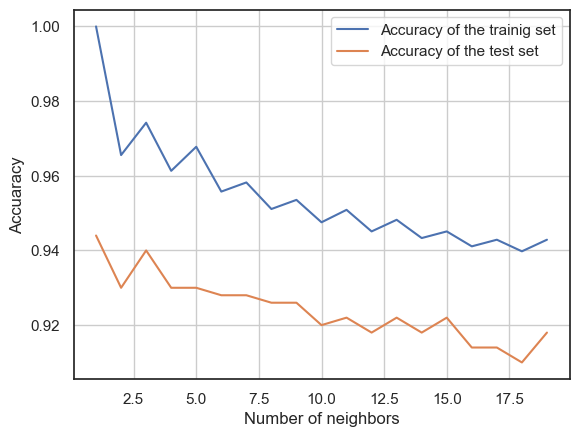

In [141]:
training_acc= []
test_acc=[]
neighbors=range(1,20)

for i in neighbors:    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.1,random_state=42)
    clf=KNeighborsClassifier(n_neighbors=i,weights=None,leaf_size=35)
    clf.fit(x_train,y_train)
    training_acc.append(clf.score(x_train,y_train))
    test_acc.append(clf.score(x_test,y_test))

plt.plot(neighbors,training_acc,label='Accuracy of the trainig set')
plt.plot(neighbors,test_acc,label='Accuracy of the test set')

plt.xlabel('Number of neighbors')
plt.ylabel('Accuaracy')
plt.grid()
plt.legend()

📊 **Kết quả nhận được:**
Biểu đồ đường hiển thị:

+ Đường training accuracy (thường giảm dần khi k tăng)

+ Đường test accuracy (thường tăng rồi giảm → có điểm cực đại → chọn k tại đó)

=> Do đó k~3

#### 4.1.3. Tự động tìm giá trị tối ưu của n_neighbors trong mô hình KNN bằng Cross-Validation

+ Bắt đầu huấn luyện toàn bộ các mô hình KNN với các giá trị n_neighbors từ 1 đến 29

+ Với mỗi giá trị, GridSearchCV(GridSearchCV là một công cụ trong thư viện scikit-learn, được dùng để: Tìm tổ hợp tham số tốt nhất (tuning hyperparameters) cho mô hình & Tự động thực hiện Cross-Validation (CV) để đánh giá độ chính xác của từng tổ hợp tham số) sẽ:

  1. Chia x_train, y_train thành 5 phần

  2. Huấn luyện và đánh giá 5 lần (mỗi lần dùng 4 phần để train, 1 phần để test)

  3. Tính trung bình điểm accuracy (với các mô hình hồi quy có thể là RMSE,MSE,...)

  4. Chọn ra giá trị n_neighbors tốt nhất

✅ Tổng kết: Dùng `GridSearchCV` với KNN

| **Mục đích chính**                             | **Chi tiết**                                                                 |
|-----------------------------------------------|------------------------------------------------------------------------------|
| ✅ Tìm giá trị `n_neighbors` tối ưu cho KNN     | Dựa trên độ chính xác (`accuracy`)                                           |
| ✅ Dùng Cross-validation (`cv=5`)              | Giúp mô hình ổn định hơn, tránh overfitting                                  |
| ✅ Không cần viết vòng lặp thủ công            | `GridSearchCV` sẽ tự động thử tất cả tổ hợp tham số                         |
| ✅ Dễ dàng truy xuất kết quả tốt nhất           | Dùng `grid_knn.best_params_`, `grid_knn.best_score_`, `grid_knn.best_estimator_` |


In [53]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'n_neighbors': range(1, 30),
    'leaf_size': range(1, 50)
}
grid_knn=GridSearchCV(estimator=knn,param_grid=parameters,scoring='accuracy',cv=5)
grid_knn.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=KNeighborsClassifier(leaf_size=35, n_neighbors=3,
                                            weights=None),
             param_grid={'leaf_size': range(1, 50),
                         'n_neighbors': range(1, 30)},
             scoring='accuracy')

In [54]:
grid_knn.best_params_


{'leaf_size': 1, 'n_neighbors': 1}

In [178]:
# Sau khi fit xong grid search
best_modelKNN = grid_knn.best_estimator_
# Chia lại tập dữ liệu test (nếu chưa có sẵn)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Dự đoán với best model
y_pred = best_modelKNN.predict(x_test)
# In classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1354
           1       0.97      0.96      0.97       146

    accuracy                           0.99      1500
   macro avg       0.98      0.98      0.98      1500
weighted avg       0.99      0.99      0.99      1500



🔍 So sánh 3 cách tìm tham số tối ưu cho mô hình KNN


| Tiêu chí | **Cách 1: Hàm `dts()` tự viết** | **Cách 2: `GridSearchCV` (chính quy)** | **Cách 3: Vẽ biểu đồ Accuracy theo `n_neighbors`** |
|---------|-------------------------------|---------------------------------------|---------------------------------------------------|
| **Phương pháp chọn tham số** | Duyệt toàn bộ tổ hợp `n_neighbors`, `leaf_size`, `test_size` bằng chia tập dữ liệu nhiều lần. | Duyệt qua `param_grid` với **cross-validation**. | Duyệt qua `n_neighbors`, cố định `leaf_size`, chia tập train-test 1 lần. |
| **Đánh giá độ chính xác** | Dựa trên `.accuracy_score()` trên tập test từng lần chia. | Dựa trên **cross-validation** (ổn định hơn). | Vẽ biểu đồ so sánh accuracy giữa tập train và test. |
| **Tính trực quan** | Có bảng chi tiết (`DataFrame`) để so sánh từng trường hợp. | Có thể trích xuất bảng kết quả (nhưng mặc định không trực quan). | **Trực quan mạnh** – biểu đồ dễ thấy overfitting/underfitting. |
| **Mức độ chính xác** | Phụ thuộc vào random split → có thể dao động. | Chính xác và ổn định nhờ K-Fold CV. | Khá đơn giản, chỉ đánh giá với 1 `test_size` và 1 `leaf_size`. |
| **Hiệu suất tính toán** | Chậm hơn nếu tổ hợp nhiều (do chạy lặp). | Hiệu quả hơn, tối ưu sẵn trong `sklearn`. | Nhanh, đơn giản, phù hợp khi chỉ muốn đánh giá sơ bộ. |
| **Khả năng mở rộng** | Tùy biến cao (thêm nhiều test size/siêu tham số). | Dễ mở rộng qua `param_grid`. | Khó mở rộng nếu muốn thử thêm nhiều biến khác. |

---

🎯 Khi nào nên dùng mỗi cách?

| Tình huống | Nên dùng cách nào |
|-----------|-------------------|
| Muốn thử nhiều tham số phức tạp (ví dụ cả `leaf_size`, `test_size`) | 👉 **Cách 1 (`dts()`)** |
| Làm bài chính quy, cần độ chính xác cao, chuyên nghiệp | 👉 **Cách 2 (`GridSearchCV`)** |
| Khám phá nhanh, trực quan hóa sự ảnh hưởng của `n_neighbors` | 👉 **Cách 3 (vẽ biểu đồ)** |

---

📌 Gợi ý kết hợp:
- **Kết hợp Cách 3 + Cách 2** là hiệu quả nhất:
  - Dùng biểu đồ (Cách 3) để **xác định phạm vi giá trị hợp lý**.
  - Dùng `GridSearchCV` (Cách 2) để **tối ưu tham số chính xác hơn** trong phạm vi đó.


🧠 **Kết luận**
+ Mô hình KNN hoạt động tốt nhất khi số lượng hàng xóm = 1, giữ nguyên leaf_size=35 và weights=None.

+ Tức là trong tập hợp các giá trị từ 1 → 29, thì n_neighbors = 1 cho kết quả tốt nhất theo cross-validation.

Text(0.5, 1.0, 'Actual')

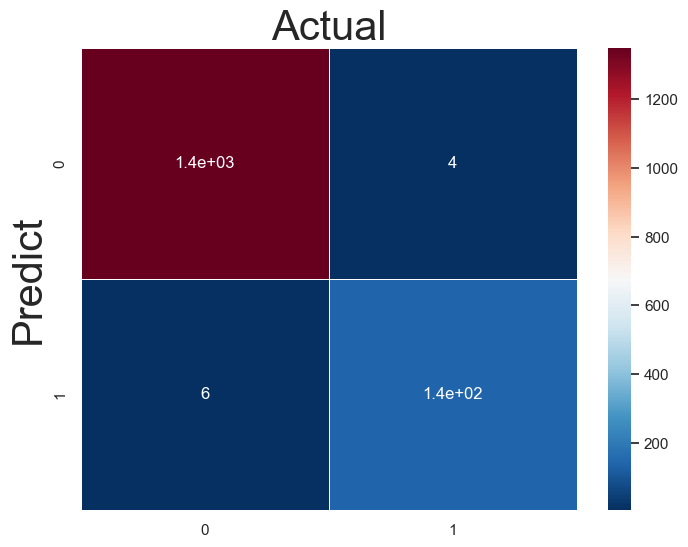

In [143]:
confusion_matrix=(metrics.confusion_matrix(y_test,y_pred))
fig, ax = plt.subplots(figsize = (8,6)) 
ax = sns.heatmap(confusion_matrix,cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.ylabel('Predict',fontsize=30)
plt.title('Actual',fontsize=30)

In [144]:
k=10
acc=np.zeros((k))
for i in range(1,k+1):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    acc[i-1]=metrics.accuracy_score(y_test,y_pred)
print(acc)
print('maximum:',acc.max())
print('minimum:',acc.min())

[0.95333333 0.94       0.948      0.93866667 0.94666667 0.93866667
 0.94133333 0.936      0.94066667 0.93733333]
maximum: 0.9533333333333334
minimum: 0.936


### 4.2. LogisticRegression

#### 4.2.1. Tìm mô hình tối ưu qua hàm lặp qua testsize và solver

In [95]:
from sklearn.linear_model import LogisticRegression
solver=['sag','saga','lbfgs','liblinear','newton-cg','newton-cholesky']
randomstate=[0,1,2,42]
def dts(x,y,testsize,solver,randomstate):
    rows = []  # Danh sách lưu từng dòng

    for i in testsize:
       for a in solver:
          for c in randomstate:
            x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=c)
            logreg = LogisticRegression(solver=a)
            logreg.fit(x_train, y_train)
            y_pred = logreg.predict(x_test)

            row = {
                'test_size': i,
                'acc': metrics.accuracy_score(y_test, y_pred),
                'score': logreg.score(x_train, y_train),  # Sửa lại clf → logreg
                'solver': a,
                'random_state': c
            }

            rows.append(row)

    df_dts = pd.DataFrame(rows)
    return df_dts.sort_values(by='acc')

dc=dts(x,y,[.1,.15,.2,.3,.05,.07],solver,randomstate)
dc.tail(10).style.highlight_max(color = 'yellow', axis = 0, subset=[ 'acc','score'])
   

#### 4.2.2. Tìm mô hình tối ưu qua Cross-validation

In [75]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [76]:
solver=['sag','saga','lbfgs','liblinear','newton-cg','newton-cholesky']
for a in solver:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)
    logreg= LogisticRegression(solver=a) 
    kfold_validation=KFold(10)
    result2=cross_val_score(logreg,x,y,cv=kfold_validation)
    #print(result2)                           
    print(np.mean(result2))

0.9509899799599196
0.9509899799599196
0.9509899799599196
0.9495895791583167
0.9509899799599196
0.9509899799599196


In [104]:
logreg2= LogisticRegression(solver='newton-cg')
params={'penalty':['l1','l2','elasticnet',None],'class_weight':[None,'balanced'],'warm_start':[False,True]}
Kfold=KFold(n_splits=5,shuffle=True,random_state=42)
gridsearch=GridSearchCV(logreg2,param_grid=params,scoring='accuracy',cv=5,n_jobs=-1)

In [105]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='newton-cg'), n_jobs=-1,
             param_grid={'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'warm_start': [False, True]},
             scoring='accuracy')

In [110]:
print(gridsearch.best_params_)
print('best score :',gridsearch.best_score_)
print('best index :',gridsearch.best_index_)
print('best estimator :',gridsearch.best_estimator_)
gridsearch.scorer_

{'class_weight': None, 'penalty': 'l2', 'warm_start': False}
best score : 0.9494138565297364
best index : 2
best estimator : LogisticRegression(solver='newton-cg')


make_scorer(accuracy_score, response_method='predict')

In [145]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
best_model_logreg= LogisticRegression(solver='newton-cg')
best_model_logreg.fit(x_train,y_train)
y_pred=best_model_logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9473333333333334


In [146]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.89      0.52      0.66       146

    accuracy                           0.95      1500
   macro avg       0.92      0.76      0.81      1500
weighted avg       0.95      0.95      0.94      1500



Text(0.5, 1.0, 'Actual')

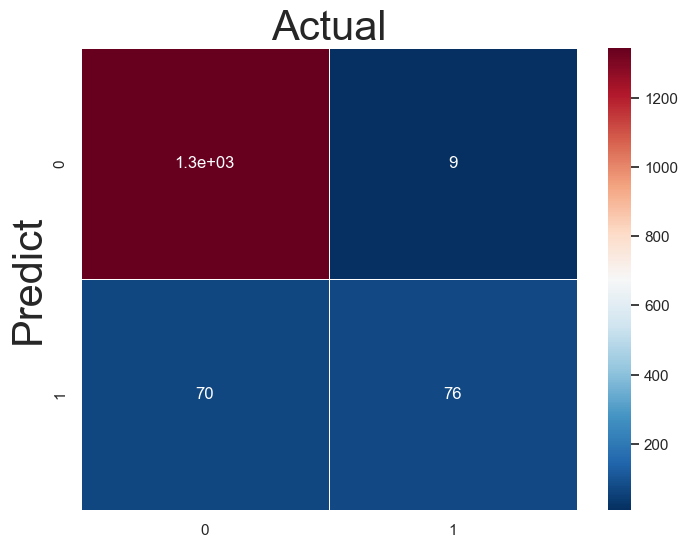

In [147]:
confusion_matrix=(metrics.confusion_matrix(y_test,y_pred))
fig, ax = plt.subplots(figsize = (8,6)) 
ax = sns.heatmap(confusion_matrix,cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.ylabel('Predict',fontsize=30)
plt.title('Actual',fontsize=30)

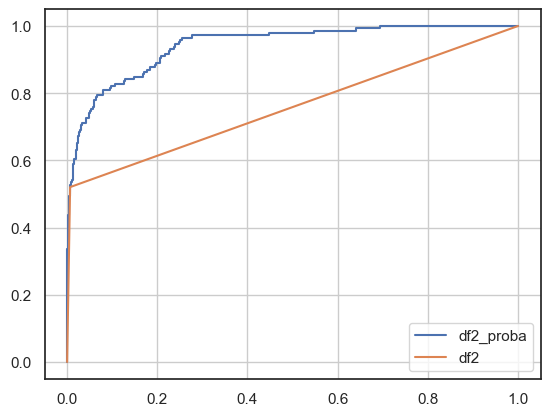

In [148]:
fpr,tpr,_=metrics.roc_curve(y_test,y_pred)
y_pred_proba=best_model_logreg.predict_proba(x_test)[::,1]
fpr2,tpr2,_=metrics.roc_curve(y_test,y_pred_proba)
plt.plot(fpr2,tpr2,label='df2_proba')
plt.plot(fpr,tpr,label='df2')
plt.legend(loc='best')
plt.grid()

### 4.3. Random Forest

#### 4.3.1. Tối ưu qua hàm lặp qua các tham số

In [149]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd

# Các dải tham số cần thử
n_estimators = range(10, 110, 10)         # Số cây trong rừng
max_depths = [None, 5, 10, 15, 20]        # Độ sâu tối đa của cây
test_sizes = [.1, .15, .2, .25, .3, .4]   # Tỉ lệ test

def rf_search(x, y, test_sizes, n_estimators, max_depths):
    df_rf = pd.DataFrame()

    for ts in test_sizes:
        for n in n_estimators:
            for d in max_depths:
                x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=ts, random_state=42)
                rf = RandomForestClassifier(n_estimators=n, max_depth=d, random_state=42)
                rf.fit(x_train, y_train)
                y_pred = rf.predict(x_test)

                result = {
                    'test_size': ts,
                    'n_estimators': n,
                    'max_depth': d,
                    'acc': metrics.accuracy_score(y_test, y_pred),
                    'train_score': rf.score(x_train, y_train)
                }

                df_rf = pd.concat([df_rf, pd.DataFrame([result])], ignore_index=True)

    return df_rf.sort_values(by='acc', ascending=False)

# Gọi hàm và hiển thị top 10 kết quả tốt nhất
rf_results = rf_search(x, y, test_sizes, n_estimators, max_depths)
rf_results.head(10).style.highlight_max(color='lightgreen', axis=0, subset=['acc', 'train_score'])


#### 4.3.2. Tối ưu qua Cross-validaiton

In [150]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rforest = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rforest, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(x_train, y_train)

print("Best params:", grid_rf.best_params_)
print("Best score:", grid_rf.best_score_)


Best params: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 150}
Best score: 0.9882832618025752


In [157]:
# Sau khi fit xong GridSearchCV cho Random Forest
best_modelRF = grid_rf.best_estimator_

# Chia lại tập dữ liệu test (nếu chưa có sẵn)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Dự đoán với mô hình tốt nhất
y_predRF = best_modelRF.predict(x_test)

# In classification report
from sklearn import metrics
print(metrics.classification_report(y_test, y_predRF))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1354
           1       0.98      0.84      0.90       146

    accuracy                           0.98      1500
   macro avg       0.98      0.92      0.95      1500
weighted avg       0.98      0.98      0.98      1500



Text(0.5, 1.0, 'Actual')

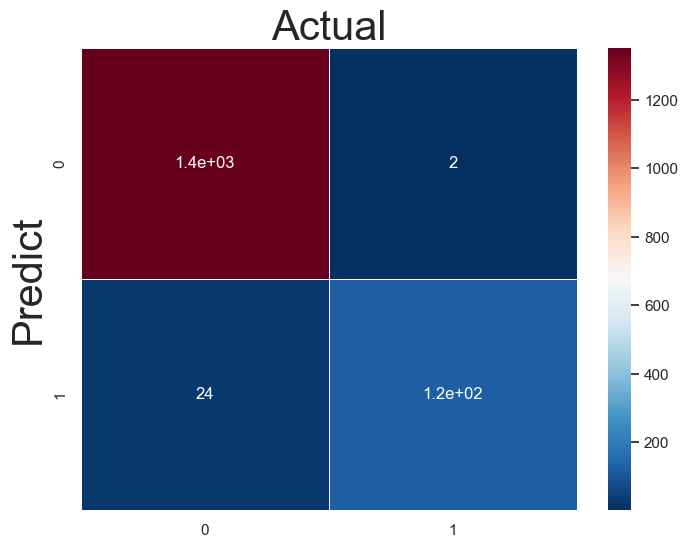

In [158]:
confusion_matrix=(metrics.confusion_matrix(y_test,y_predRF))
fig, ax = plt.subplots(figsize = (8,6)) 
ax = sns.heatmap(confusion_matrix,cmap='RdBu_r',cbar=True,annot=True,linewidths=0.5,ax=ax)
plt.ylabel('Predict',fontsize=30)
plt.title('Actual',fontsize=30)

### 4.4. Dự báo trên dữ liệu chưa chuẩn hoá

In [193]:
x=pd.DataFrame(df2.drop(['Personal Loan','Place'],axis=1))
y=pd.DataFrame(df2['Personal Loan'].values.reshape(-1,1))

In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=42)
best_model_logreg= LogisticRegression(solver='newton-cg')
best_model_logreg.fit(x_train,y_train)
y_pred=best_model_logreg.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.9453333333333334


In [195]:
# Sau khi fit xong grid search
best_modelKNN = grid_knn.best_estimator_
# Chia lại tập dữ liệu test (nếu chưa có sẵn)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Dự đoán với best model
y_pred = best_modelKNN.predict(x_test)
# In classification report
from sklearn import metrics
#print(metrics.classification_report(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))

0.9026666666666666


In [196]:
# Sau khi fit xong GridSearchCV cho Random Forest
best_modelRF = grid_rf.best_estimator_
# Chia lại tập dữ liệu test (nếu chưa có sẵn)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Dự đoán với mô hình tốt nhất
y_predRF = best_modelRF.predict(x_test)
# In classification report
from sklearn import metrics
print(metrics.accuracy_score(y_test,y_pred))

0.9026666666666666


Với dữ liệu đầu vào chưa được chuẩn hoá, kết quả dự báo nhận được từ mô hình KNN, RF kém hơn so với dự báo từ mô hình Logistic Regression

### 4.5. ROC & AUC

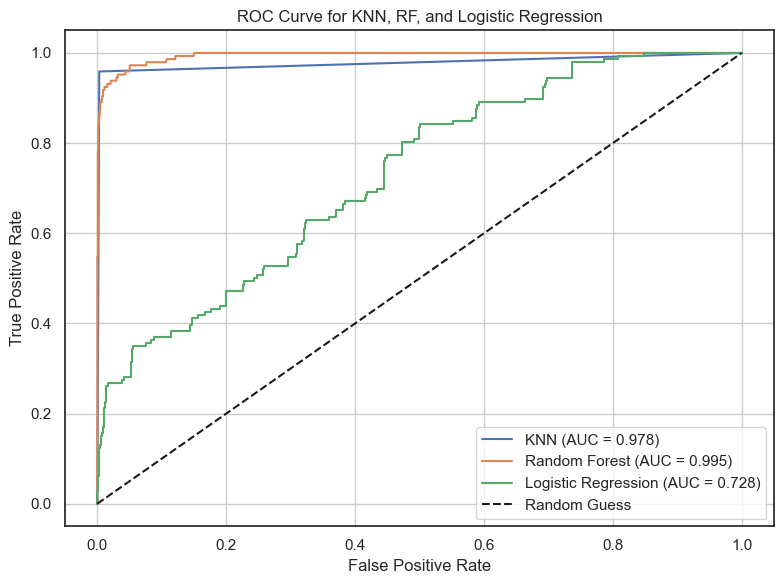

In [201]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# --- 1. Chuẩn hóa dữ liệu ---
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm = scaler.fit_transform(df2.drop(['Personal Loan','Place'], axis=1))
x = pd.DataFrame(norm, columns=df2.drop(['Personal Loan','Place'], axis=1).columns)
y = pd.DataFrame(df2['Personal Loan'].values.reshape(-1, 1))

# --- 2. Chia dữ liệu ---
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# --- 3. Dự đoán với mô hình đã tối ưu ---
y_pred_knn = best_modelKNN.predict(x_test)
y_pred_rf  = best_modelRF.predict(x_test)
y_pred_lg  = best_model_logreg.predict(x_test)

# --- 4. Tính xác suất để vẽ ROC ---
y_proba_knn = best_modelKNN.predict_proba(x_test)[:, 1]
y_proba_rf  = best_modelRF.predict_proba(x_test)[:, 1]
y_proba_lg  = best_model_logreg.predict_proba(x_test)[:, 1]

# --- 5. Tính ROC & AUC ---
fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test, y_proba_knn)
fpr_rf,  tpr_rf,  _ = metrics.roc_curve(y_test, y_proba_rf)
fpr_lg,  tpr_lg,  _ = metrics.roc_curve(y_test, y_proba_lg)

auc_knn = metrics.roc_auc_score(y_test, y_proba_knn)
auc_rf  = metrics.roc_auc_score(y_test, y_proba_rf)
auc_lg  = metrics.roc_auc_score(y_test, y_proba_lg)

# --- 6. Vẽ đường ROC ---
plt.figure(figsize=(8,6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.3f})")
plt.plot(fpr_rf,  tpr_rf,  label=f"Random Forest (AUC = {auc_rf:.3f})")
plt.plot(fpr_lg,  tpr_lg,  label=f"Logistic Regression (AUC = {auc_lg:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")

plt.title("ROC Curve for KNN, RF, and Logistic Regression")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
